<a href="https://colab.research.google.com/github/Andrezanincruz01/DissertacaoAndre/blob/main/Imagensdisserta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

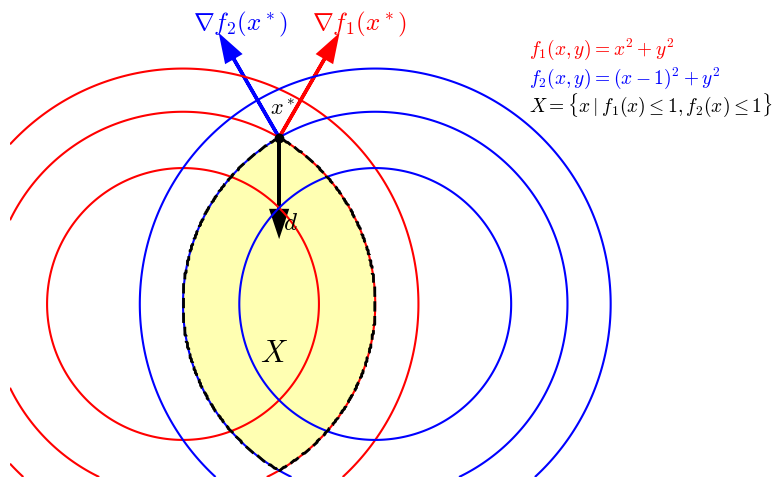

In [ ]:
#================================================================
# Figura 2.8: Exemplo de direção de descida para uma função F(x)
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ======================Bibliotecas básicas ===================================
import numpy as np                     # Álgebra vetorial para pythom
import matplotlib.pyplot as plt        # Criação de gráficos

# Configurações de estilo de texto:
# Não usar LaTeX externo, mas sim MathText do Matplotlib
# Fonte serifada Computer Modern para todos os textos
plt.rcParams['text.usetex']      = False
plt.rcParams['font.family']      = 'serif'
plt.rcParams['font.serif']       = ['Computer Modern']
plt.rcParams['mathtext.fontset'] = 'cm'

# Definição das funções de nível f1 e f2
# f1: círculo centrado na origem
# f2: círculo centrado em (1,0)
def f1(x, y):
    return x**2 + y**2

def f2(x, y):
    return (x - 1)**2 + y**2

# Ponto de interseção x* satisfaz f1(x*) = f2(x*) = 1
x_star = np.array([0.5, np.sqrt(1 - 0.5**2)])

# Calcula os gradientes em x*
grad_f1 = np.array([2*x_star[0], 2*x_star[1]])
grad_f2 = np.array([2*(x_star[0] - 1), 2*x_star[1]])

# Direção de descida
d = -(grad_f1 + grad_f2)
d_unit = d / np.linalg.norm(d) * 0.5  # escala para visualização

# Cria grade para contornos
xx = np.linspace(-0.9, 2.5, 500)
yy = np.linspace(-0.9, 1.5, 400)
X, Y = np.meshgrid(xx, yy)
Z1 = f1(X, Y)
Z2 = f2(X, Y)

# Região de interseção X = {x | f1(x)<=1 e f2(x)<=1}
mask = (Z1 <= 1) & (Z2 <= 1)

plt.figure(figsize=(10,5))

# # Preenche a região de interseção em amarelo
plt.contourf(X, Y, mask.astype(int), levels=[0.5,1.5], colors='yellow', alpha=0.3)

# Contornos de f1 e f2 para cada curva de nível0.5, 1.0, 1.5
nivel = [0.5, 1.0, 1.5]
plt.contour(X, Y, Z1, levels=nivel, colors='red', linewidths=1.5)
plt.contour(X, Y, Z2, levels=nivel, colors='blue', linewidths=1.5)

# desenho pontilhado da fronteira da região X
plt.contour(X, Y, mask.astype(int), levels=[0.5], colors='black', linestyles='--', linewidths=2)

# Configuração de setas para gradientes e direção de descida, é um dicionário que agrupa parâmetros de estilo para todas as setas
arrow_kw = dict(head_width=0.08, length_includes_head=True, linewidth=2.5)

plt.arrow(x_star[0], x_star[1], grad_f1[0]*0.3, grad_f1[1]*0.3, color='red', **arrow_kw)
plt.text(x_star[0] + grad_f1[0]*0.15 + 0.02, x_star[1] + grad_f1[1]*0.15 + 0.3, r'$\nabla f_1(x^*)$', color='red', fontsize=18)
plt.arrow(x_star[0], x_star[1], grad_f2[0]*0.3, grad_f2[1]*0.3, color='blue', **arrow_kw)
plt.text(x_star[0] + grad_f2[0]*0.15 - 0.3, x_star[1] + grad_f2[1]*0.15 + 0.3, r'$\nabla f_2(x^*)$', color='blue', fontsize=18)

# Descent direction arrow
plt.arrow(x_star[0], x_star[1], d_unit[0], d_unit[1], color='black', head_width=0.08, length_includes_head=True, linewidth=2.5)
plt.text(x_star[0] + d_unit[0] + 0.02, x_star[1] + d_unit[1] + 0.02, r'$d$', color='black', fontsize=18)

# Marca o ponto x*
plt.scatter(*x_star, color='black', zorder=5)
plt.text(x_star[0] - 0.05, x_star[1] + 0.12, r'$x^*$', fontsize=16, color='black')

# Adiciona o texto de X dentro da região amarela
plt.text(0.4, -0.3, r'$X$', fontsize=22, color='black')

# Notações para f1, f2, e X
plt.text(1.8, 1.3, r'$f_1(x,y)=x^2+y^2$', color='red', fontsize=14)
plt.text(1.8, 1.15, r'$f_2(x,y)=(x-1)^2+y^2$', color='blue', fontsize=14)
plt.text(1.8, 1.0, r'$X=\{x \mid f_1(x)\leq 1, f_2(x)\leq 1\}$', color='black', fontsize=14)

# últimos ajustes
plt.gca().set_aspect('equal', 'box') #plt.gca obtém o eixo com set_aspect aplica aa mesma escala de x e y em ambos os lados da caixa
plt.axis('off')                      # Desligando elementos visuais como grade e rótulos numéricos
plt.tight_layout()                   # Ajusta automaticamente o espaçamento entre títulos e legendas para evitar sobreposição
plt.show()                           # Abre a janela do gráfico

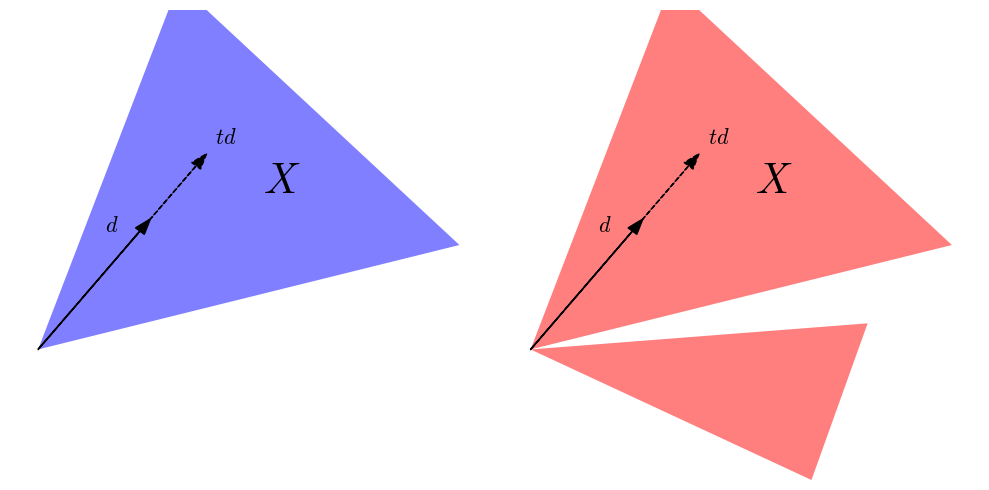

In [ ]:
#================================================================
# Figura 1.5: Exemplo de cone convexo e não convexo.
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ======================Bibliotecas básicas ===================================
import numpy as np                     # Álgebra vetorial para pythom
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon # Criação de poligonos (polygon)

# Configurações de estilo de texto:
# Não usar LaTeX externo, mas sim MathText do Matplotlib
# Fonte serifada Computer Modern para todos os textos
plt.rcParams['text.usetex']      = False
plt.rcParams['font.family']      = 'serif'
plt.rcParams['font.serif']       = ['Computer Modern']
plt.rcParams['mathtext.fontset'] = 'cm'


# define direção mais curta
base = np.array([0.8, 1])
d    = base * 0.5         # d mais curto
t    = 1.5
td   = d * t              # td proporcionalmente mais longo

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Conjunto convexo X (azul)
cone1 = Polygon([[0, 0], [0.5, 1.4], [1.5, 0.4]], closed=True,
                facecolor='blue', alpha=0.5)  # Estrutura do polygon é Polygon(xy, closed=True, parâmetros de estilo para cor (facecolor/edgecolor/...))
                                              # xy=[[x0,y0],[x1,y1]...] lista de coordenadas dos vértices
                                              # Close=True informa que o último vértice recisa ser fechado de volta ao primeiro.
axs[0].add_patch(cone1)
axs[0].arrow(0, 0, d[0], d[1],
             head_width=0.04, length_includes_head=True,
             color='black')
axs[0].arrow(0, 0, td[0], td[1],
             head_width=0.04, length_includes_head=True,
             linestyle='--', color='black')
axs[0].text(d[0]*0.6, d[1]*0.9,    r'$d$',  fontsize=16, color='black')
axs[0].text(td[0]*1.05, td[1]*1.05, r'$td$', fontsize=16, color='black')
axs[0].text(0.8, 0.6,              r'$X$',  fontsize=30, color='black')
#axs[0].set_title('Conjunto convexo', fontsize=16)

# Conjunto não convexo X (vermelho)
cone2a = Polygon([[0, 0], [0.5, 1.4], [1.5, 0.4]], closed=True,
                 facecolor='red', alpha=0.5)
cone2b = Polygon([[0, 0], [1.2, 0.1], [1, -0.5]], closed=True,
                 facecolor='red', alpha=0.5)
axs[1].add_patch(cone2a)
axs[1].add_patch(cone2b)
axs[1].arrow(0, 0, d[0], d[1],
             head_width=0.04, length_includes_head=True,
             color='black')
axs[1].arrow(0, 0, td[0], td[1],
             head_width=0.04, length_includes_head=True,
             linestyle='--', color='black')
axs[1].text(d[0]*0.6, d[1]*0.9,    r'$d$',  fontsize=16, color='black')
axs[1].text(td[0]*1.05, td[1]*1.05, r'$td$', fontsize=16, color='black')
axs[1].text(0.8, 0.6,              r'$X$',  fontsize=30, color='black')
#axs[1].set_title('Conjunto não convexo', fontsize=16)

for ax in axs: #Para cada um dos eixos (axs[0], axs[1])
    ax.set_xlim(-0.1, 1.6) #fixo limites no eixo x e y para ficarem na mesma janela de visualização
    ax.set_ylim(-0.5, 1.3)
    ax.axis('off')

plt.tight_layout()
plt.show()


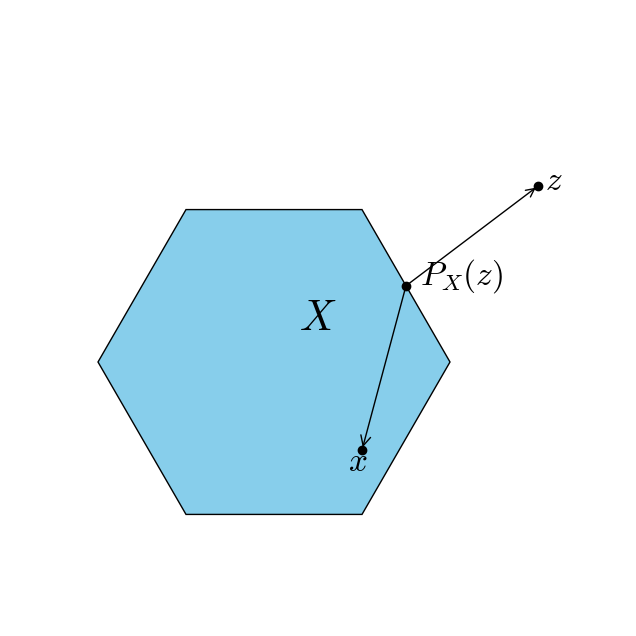

In [ ]:
#================================================================
# Figura 1.4: Ilustração do Teorema da Projeção.
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ======================Bibliotecas básicas ===================================
import numpy as np                     # Álgebra vetorial para pythom
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch # criação de poligonos e setas distintas

# Configurações de estilo de texto:
# Não usar LaTeX externo, mas sim MathText do Matplotlib
# Fonte serifada Computer Modern para todos os textos
plt.rcParams['text.usetex']      = False
plt.rcParams['font.family']      = 'serif'
plt.rcParams['font.serif']       = ['Computer Modern']
plt.rcParams['mathtext.fontset'] = 'cm'


# Define hexágono e pontos como antes
centro = (3,3)
raio = 2.0 #distância do centro até cada vértice
angulos = np.linspace(0,2*np.pi,6,endpoint=False)  #Ângulos em que colocaremos os vértices, são uniformemente espaçados de 0 a 2π
# Calculamos agora as coordenadas de cada vértice:
#    Para cada ângulo a, calculamos:
#    x = centro_x + raio * cos(a)
#    y = centro_y + raio * sen(a)
hexagon_vertices = [(centro[0]+raio*np.cos(a), centro[1]+raio*np.sin(a)) for a in angulos]

x = (4,2) #Ponto do exemplo

P = ((hexagon_vertices[0][0]+hexagon_vertices[1][0])/2,
     (hexagon_vertices[0][1]+hexagon_vertices[1][1])/2)# P faz o papel de projeção de z no hexágono, aqui mostrado como ponto médio do primeiro lado
z = (6,5)

fig, ax = plt.subplots(figsize=(8,8)) #cria a figura
poly = Polygon(hexagon_vertices, closed=True, facecolor='skyblue', edgecolor='black') #desenha o poligono (hexágono)
ax.add_patch(poly)

# Anotações de texto e marcadores
ax.text(3.5,3.5, r'$X$', fontsize=30, ha='center', va='center')
ax.scatter(*x, color='black'); ax.annotate(r'$x$', x, xytext=(-10,-15), textcoords='offset points', fontsize=24)
ax.scatter(*P, color='black'); ax.annotate(r'$P_X(z)$', P, xytext=(10,1), textcoords='offset points', fontsize=24)
ax.scatter(*z, color='black'); ax.annotate(r'$z$', z, xytext=(5,-3), textcoords='offset points', fontsize=24)

# Desenha setas de projeção FancyArrowPatch(P, x, arrowstyle='->', mutation_scale=18)
arrow1 = FancyArrowPatch(P,x, arrowstyle='->', mutation_scale=18)
arrow2 = FancyArrowPatch(P, z, arrowstyle='->', mutation_scale=15)
ax.add_patch(arrow1); ax.add_patch(arrow2)

# Ajustes de visualização:
ax.set_xlim(0,7); ax.set_ylim(0,7)
ax.set_aspect('equal'); ax.axis('off')
plt.show()


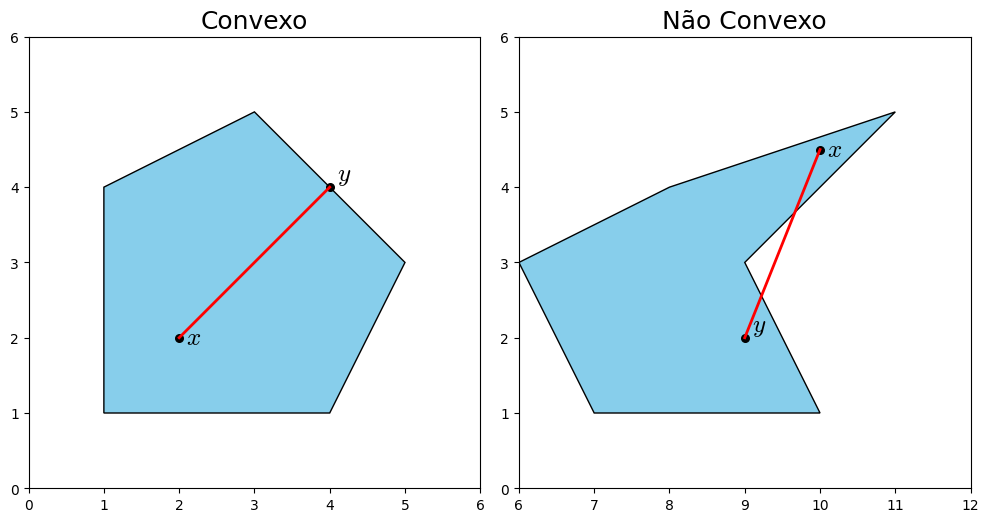

In [ ]:
#================================================================
# Figura 1.2: Exemplo de conjunto convexo e não convexo.
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ======================Bibliotecas básicas ===================================
import numpy as np                     # Álgebra vetorial para pythom
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch # criação de poligonos e setas distintas

# 1) Use MathText sem LaTeX externo, mas com Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm'

# Define vértices para as duas formas
convex_vertices   = [(1, 1), (4, 1), (5, 3), (3, 5), (1, 4)] #vertices da figura convexa
concave_vertices  = [(7, 1), (10, 1), (9, 3), (11, 5), (8, 4), (6, 3)] #vertices da figura não convexa

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# ======================= Polinómio 1 Convexo ==========================================
poly1 = Polygon(convex_vertices,
                closed=True,
                facecolor='skyblue',
                edgecolor='black')
axes[0].add_patch(poly1)

x1 = (2, 2)
y1 = (4, 4)
# segmento
axes[0].plot([x1[0], y1[0]],
             [x1[1], y1[1]],
             color='red', linewidth=2)
# pontos x e y como bolinha preta maior
axes[0].scatter(*x1, color='black', marker='o', s=30)
axes[0].scatter(*y1, color='black', marker='o', s=30)
# legendas dos pontos
axes[0].annotate(f'$x$', x1, textcoords="offset points",fontsize="18", xytext=(5, -5))
axes[0].annotate(f'$y$', y1, textcoords="offset points",fontsize="18", xytext=(5,  5))

axes[0].set_title('Convexo',fontsize="18")
axes[0].set_xlim(0, 6)
axes[0].set_ylim(0, 6)
axes[0].set_aspect('equal')


# Não Convexa (em azul)
poly2 = Polygon(concave_vertices,
                closed=T/rue,
                facecolor='skyblue',
                edgecolor='black')
axes[1].add_patch(poly2)

# pontos escolhidos de modo que o segmento passe por fora
x2 = (10, 4.5)
y2 = (9, 2)
axes[1].plot([x2[0], y2[0]],
             [x2[1], y2[1]],
             color='red', linewidth=2)
axes[1].scatter(*x2, color='black', marker='o', s=30)
axes[1].scatter(*y2, color='black', marker='o', s=30)
axes[1].annotate(f'$x$', x2, textcoords="offset points",fontsize="18", xytext=(5, -5))
axes[1].annotate(f'$y$', y2, textcoords="offset points",fontsize="18", xytext=(5,  5))

axes[1].set_title('Não Convexo',fontsize="18")
axes[1].set_xlim(6, 12)
axes[1].set_ylim(0, 6)
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()


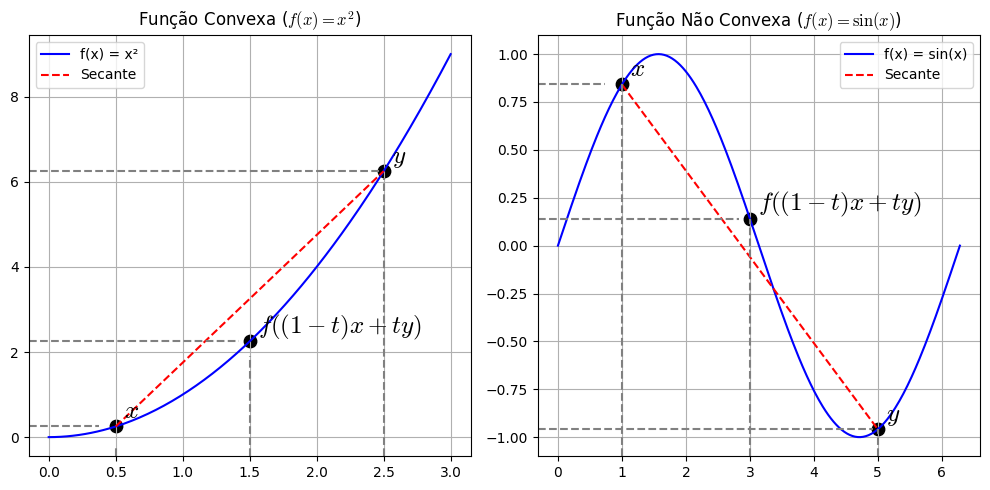

In [ ]:
#================================================================
# Figura 1.3: Exemplo de funções convexas e não convexas
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ====================== Bibliotecas básicas ========================
import numpy as np                     # Álgebra vetorial para Python
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch  # Criação de polígonos e setas distintas

# 1) Configuração de MathText sem LaTeX externo, mas com a fonte Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm'


# Funções definidas explicitamente

# Função Convexa: f(x) = x²
def f_convexa(x):
    return x**2

# Função Não Convexa: f(x) = sin(x)
def f_nao_convexa(x):
    return np.sin(x)

# Função para a secante
def secante(x1, y1, t):
    return (1 - t) * x1 + t * y1


# Parâmetro t para combinação convexa (0 <= t <= 1)
t = 0.5

# Parâmetros para o gráfico da função convexa
x1_conv = 0.5
y1_conv = 2.5
m1_conv = secante(x1_conv, y1_conv, t)

# Domínio para plotar a função convexa
tx = np.linspace(0, 3, 200)

# Parâmetros para o gráfico da função não convexa
x2_non = 1.0
y2_non = 5
m2_non = secante(x2_non, y2_non, t)

# Domínio para plotar a função não convexa
tn = np.linspace(0, 2*np.pi, 300)

# Cria figura e eixos para plotar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# ======================== Gráfico da Função Convexa ==================
ax = axes[0]
ax.plot(tx, f_convexa(tx), color='blue', label='f(x) = x²')

# Secante em vermelho
ax.plot([x1_conv, y1_conv], [f_convexa(x1_conv), f_convexa(y1_conv)], '--', color='red', label='Secante')

# Pontos principais da função convexa
pontos_convexos = {'$x$': x1_conv, '$y$': y1_conv, '$f((1-t)x + ty)$': m1_conv}
for label, xv in pontos_convexos.items():
    yv = f_convexa(xv)
    ax.scatter(xv, yv, color='black', marker='o', s=80)  # Plotando os pontos
    ax.annotate(label, (xv, yv), textcoords="offset points", fontsize="18", xytext=(6,6))

    # Traços perpendiculares para os pontos
    ax.axvline(x=xv, ymin=0, ymax=yv/ax.get_ylim()[1], linestyle='--', color='gray')
    ax.axhline(y=yv, xmin=0, xmax=xv/ax.get_xlim()[1], linestyle='--', color='gray')

ax.set_title(f'Função Convexa ($f(x)=x^2$)')
ax.legend()
ax.grid(True)

# ===================== Gráfico da Função Não Convexa =================
ax = axes[1]
ax.plot(tn, f_nao_convexa(tn), color='blue', label='f(x) = sin(x)')

# Secante em vermelho
ax.plot([x2_non, y2_non], [f_nao_convexa(x2_non), f_nao_convexa(y2_non)], '--', color='red', label='Secante')

# Pontos principais da função não convexa
pontos_nao_convexos = {'$x$': x2_non, '$y$': y2_non, '$f((1-t)x + ty)$': m2_non}
for label, xv in pontos_nao_convexos.items():
    yv = f_nao_convexa(xv)
    ax.scatter(xv, yv, color='black', marker='o', s=80)  # Plotando os pontos
    ax.annotate(label, (xv, yv), textcoords="offset points", fontsize="18", xytext=(6,6))

    # Traços perpendiculares para os pontos
    ax.axvline(x=xv, ymin=0, ymax=(yv - ax.get_ylim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0]),
               linestyle='--', color='gray')
    ax.axhline(y=yv, xmin=0, xmax=xv/ax.get_xlim()[1], linestyle='--', color='gray')

ax.set_title(f'Função Não Convexa ($f(x)=\sin(x)$)')
ax.legend()
ax.grid(True)

# Ajuste da disposição dos gráficos
plt.tight_layout()
plt.show()


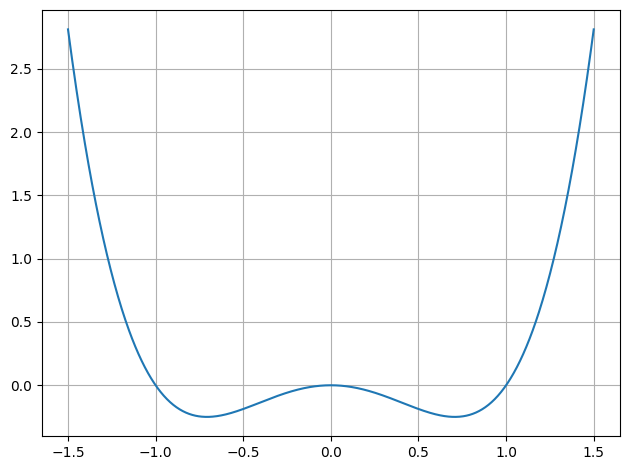

In [ ]:
#================================================================
# Figura 1.1: Exemplo de funções convexas e não convexas
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ====================== Bibliotecas básicas ========================
import numpy as np                     # Álgebra vetorial para Python
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch  # Criação de polígonos e setas distintas

# 1) Configuração de MathText sem LaTeX externo, mas com a fonte Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm'

# cria 1000 pontos igualmente espaçados no intervalo -1.5 até 1.5
x = np.linspace(-1.5, 1.5, 1000)

# Calcula o valor de $y$ para cada elemento de $x$.
y = x**4 - x**2


# Cria figura e eixos

fig, ax = plt.subplots()
ax.plot(x, y)

ax.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1-77637007.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-1-77637007.py:149: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


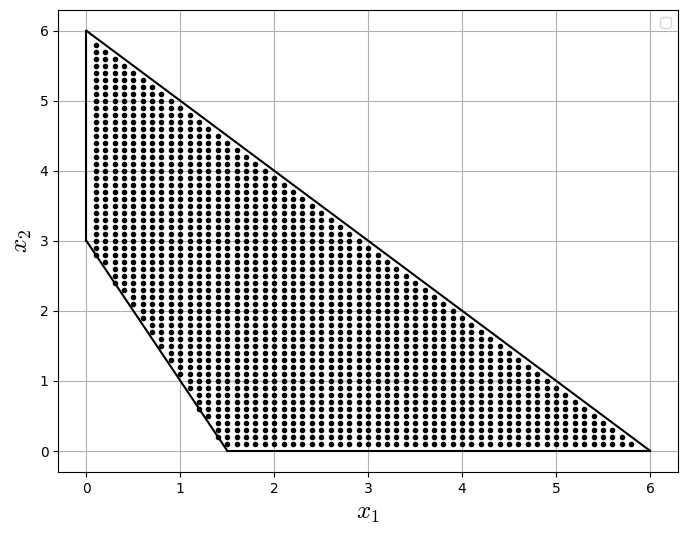

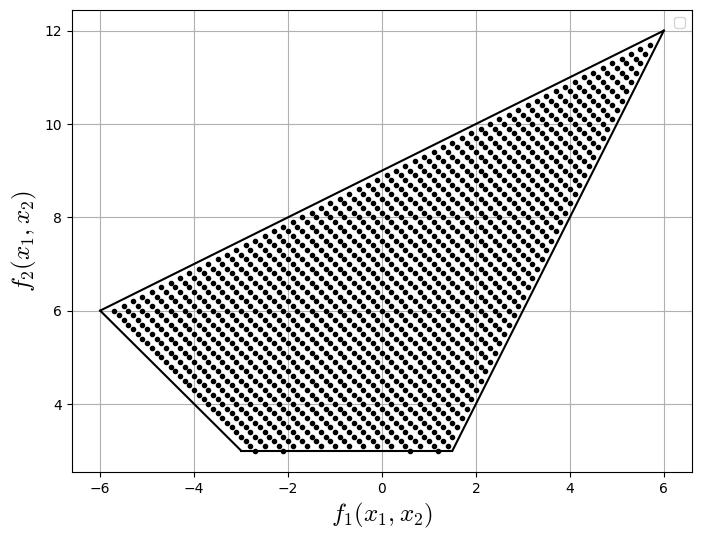

In [ ]:
#================================================================
# Figuras 2.1 e 2.2: Exemplo de funções convexas e não convexas
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ====================== Bibliotecas básicas ========================
import numpy as np                     # Álgebra vetorial para Python
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch  # Criação de polígonos e setas distintas

# 1) Configuração de MathText sem LaTeX externo, mas com a fonte Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm'

# Define os intervalos para as variáveis
x1 = np.arange(0, 6.0 + 0.1, 0.1)  # de 0 a 6 com passo 0.1
x2 = np.arange(0, 6.0 + 0.1, 0.1)
x3 = np.arange(-6, 6 + 0.25, 0.25)
x4 = np.arange(0, 6 + 0.25, 0.25)

# Listas para armazenar os valores
x1_vals = []
x2_vals = []
x3_vals = []
x4_vals = []
x5_vals = []
x6_vals = []
x7_vals = []
x8_vals = []
x9_vals = []
x10_vals = []
x11_vals = []
x12_vals = []
x13_vals = []
x14_vals = []

# Utiliza uma tolerância para igualdade com números float
tol = 1e-9

# Primeiro loop: para x11_vals e x12_vals (condição: x3 + x4 >= 0, x3 <= -3 e x4 >= 3)
for a in x3:
    for b in x4:
        if a + b >= 0 and a <= -3 and b >= 3:
            x11_vals.append(a)
            x12_vals.append(b)

# Segundo loop: para x13_vals e x14_vals (condição: x3 + x4 >= -3, x3 <= -3 e x4 >= 3)
for a in x3:
    for b in x4:
        if a + b >= -3 and a <= -3 and b >= 3:
            x13_vals.append(a)
            x14_vals.append(b)

# Loop para a condição: x1 + x2 == 6
for a in x1:
    for b in x2:
        if abs(a + b - 6) < tol:
            x1_vals.append(a)
            x2_vals.append(b)

# Loop para a condição: 2*x1 + x2 == 3
for a in x1:
    for b in x2:
        if abs(2 * a + b - 3) < tol:
            x3_vals.append(a)
            x4_vals.append(b)

# Loop: caso x1 == 0 e 2*x1 + x2 >= 3 e x1 + x2 <= 6
for a in x1:
    for b in x2:
        if abs(a - 0) < tol and (2 * a + b) >= 3 and (a + b) <= 6:
            x5_vals.append(a)
            x6_vals.append(b)

# Loop: caso x2 == 0 e 2*x1 + x2 >= 3 e x1 + x2 <= 6
for a in x1:
    for b in x2:
        if abs(b - 0) < tol and (2 * a + b) >= 3 and (a + b) <= 6:
            x7_vals.append(a)
            x8_vals.append(b)

# Loop: caso x1 > 0, x2 > 0 e 2*x1 + x2 > 3 e x1 + x2 < 6
for a in x1:
    for b in x2:
        if a > 0 and b > 0 and (2 * a + b) > 3 and (a + b) < 6:
            x9_vals.append(a)
            x10_vals.append(b)

# Plot da região factível Omega no espaço (x1, x2)
plt.figure(figsize=(8, 6))
plt.plot(x1_vals, x2_vals, 'k-')
plt.plot(x3_vals, x4_vals, 'k-')
plt.plot(x5_vals, x6_vals, 'k-')
plt.plot(x7_vals, x8_vals, 'k-')
plt.plot(x9_vals, x10_vals, 'k.')
plt.xlabel(r'$x_1$', fontsize=18, fontweight='bold')
plt.ylabel(r'$x_2$', fontsize=18, fontweight='bold')
#plt.title('Conjunto admissível no espaço das soluções', fontsize=16)
plt.grid(True)
plt.legend()

# Calcula as imagens das funções objetivo
# Para os pontos obtidos a partir de (x1_vals, x2_vals)
f1_vals = [a - b for a, b in zip(x1_vals, x2_vals)]
f2_vals = [2 * a + b for a, b in zip(x1_vals, x2_vals)]

# Para os pontos obtidos a partir de (x3_vals, x4_vals)
f3_vals = [a - b for a, b in zip(x3_vals, x4_vals)]
f4_vals = [2 * a + b for a, b in zip(x3_vals, x4_vals)]

# Para os pontos obtidos a partir de (x5_vals, x6_vals)
f5_vals = [a - b for a, b in zip(x5_vals, x6_vals)]
f6_vals = [2 * a + b for a, b in zip(x5_vals, x6_vals)]

# Para os pontos obtidos a partir de (x7_vals, x8_vals)
f7_vals = [a - b for a, b in zip(x7_vals, x8_vals)]
f8_vals = [2 * a + b for a, b in zip(x7_vals, x8_vals)]

# Para os pontos obtidos a partir de (x9_vals, x10_vals)
f9_vals = [a - b for a, b in zip(x9_vals, x10_vals)]
f10_vals = [2 * a + b for a, b in zip(x9_vals, x10_vals)]

# Para os pontos obtidos a partir de (x11_vals, x12_vals)
f11_vals = x11_vals.copy()  # Mantém os mesmos valores
f12_vals = x12_vals.copy()

# Plot da região imagem Y no espaço (f1, f2)
plt.figure(figsize=(8, 6))
plt.plot(f1_vals, f2_vals, 'k-')
plt.plot(f3_vals, f4_vals, 'k-')
plt.plot(f5_vals, f6_vals, 'k-')
plt.plot(f7_vals, f8_vals, 'k-')
plt.plot(f9_vals, f10_vals, 'k.')

# Caso deseje plotar retas ou pontos adicionais, defina as variáveis correspondentes.
# Por exemplo:
# reta3x = [-6, -4]
# reta3y = [4, 4]
# reta4x = [-4, -4]
# reta4y = [4, 2]
# Pontaux3 = [-3, 6]
#
# Descomente as linhas abaixo se as definições estiverem corretas:
# plt.plot(reta3x, reta3y, 'k-', label='reta3')
# plt.plot(reta4x, reta4y, 'k-', label='reta4')
# plt.plot(Pontaux3[0], Pontaux3[1], 'k-', label='Pontaux3')

plt.xlabel(r'$f_1(x_1,x_2)$', fontsize=18, fontweight='bold')
plt.ylabel(r'$f_2(x_1,x_2)$', fontsize=18, fontweight='bold')
#plt.title('Conjunto admissível no espaço dos objetivos', fontsize=16)
plt.grid(True)
plt.legend()

plt.show()


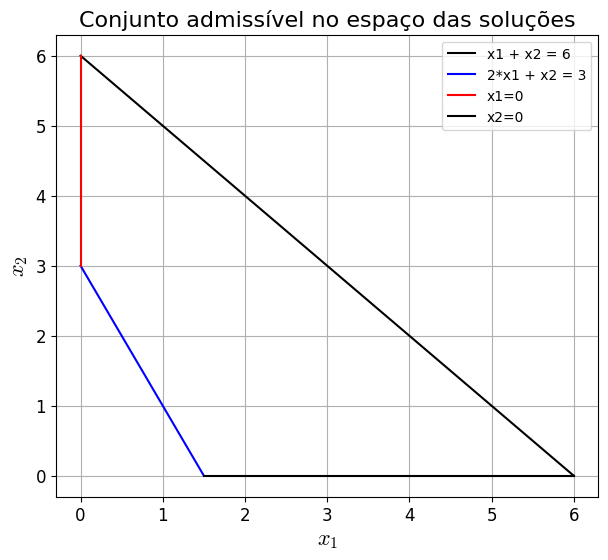

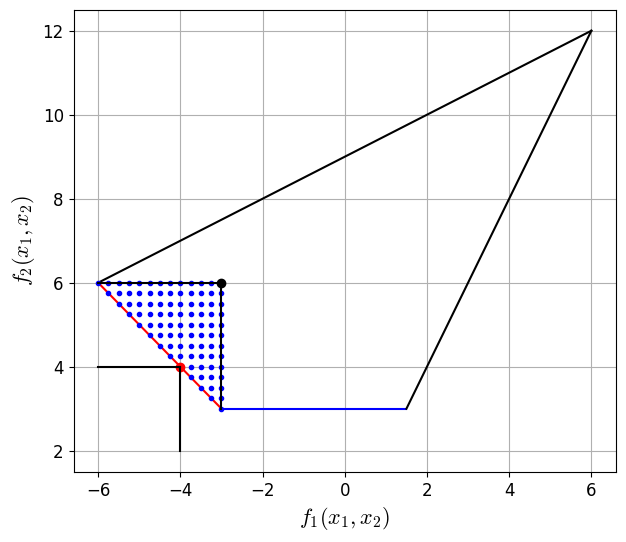

In [ ]:
#================================================================
# Figura 2.6: Conjunto admissível do espaço dos objetivos do problema
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ====================== Bibliotecas básicas ========================
import numpy as np                     # Álgebra vetorial para Python
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch  # Criação de polígonos e setas distintas

# 1) Configuração de MathText sem LaTeX externo, mas com a fonte Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm'

# Geração dos vetores x1, x2, x3, x4
# Equivalente a "0:0.1:6" (Octave) é np.arange(0,6+0.1,0.1) ou np.arange(0,6.1,0.1)
x1 = np.arange(0, 6.1, 0.1)     # Faixa de valores para x1
x2 = np.arange(0, 6.1, 0.1)     # Faixa de valores para x2
x3 = np.arange(-6, 6.25, 0.25)  # Faixa de valores para x3
x4 = np.arange(0, 6.25, 0.25)   # Faixa de valores para x4

# Inicialização de listas para armazenar os pontos que atendem cada condição
x1_vals = []
x2_vals = []
x3_vals = []
x4_vals = []
x5_vals = []
x6_vals = []
x7_vals = []
x8_vals = []
x9_vals = []
x10_vals = []
x11_vals = []
x12_vals = []
x13_vals = []
x14_vals = []

# Loop 1: condições para x3, x4
for i in range(len(x3)):
    for j in range(len(x4)):
        # if x3(i) + x4(j) >= 0 && x3(i)<=-3 && x4(j)>=3
        if (x3[i] + x4[j] >= 0) and (x3[i] <= -3) and (x4[j] >= 3):
            x11_vals.append(x3[i])
            x12_vals.append(x4[j])

# Loop 2: mais condições para x3, x4
for i in range(len(x3)):
    for j in range(len(x4)):
        # if x3(i) + x4(j) >= -3 && x3(i) <= -3 && x4(j) >= 3
        if (x3[i] + x4[j] >= -3) and (x3[i] <= -3) and (x4[j] >= 3):
            x13_vals.append(x3[i])
            x14_vals.append(x4[j])

# Loop 3: condição x1(i) + x2(j) == 6
for i in range(len(x1)):
    for j in range(len(x2)):
        if abs(x1[i] + x2[j] - 6) < 1e-9:  # uso de tolerância em floats
            x1_vals.append(x1[i])
            x2_vals.append(x2[j])

# Loop 4: condição 2*x1(i) + x2(j) == 3
for i in range(len(x1)):
    for j in range(len(x2)):
        if abs(2*x1[i] + x2[j] - 3) < 1e-9:
            x3_vals.append(x1[i])
            x4_vals.append(x2[j])

# Loop 5: x1(i)==0 && 2*x1(i) + x2(j) >=3 && x1(i) + x2(j) <=6
for i in range(len(x1)):
    for j in range(len(x2)):
        if abs(x1[i]) < 1e-9 and (2*x1[i] + x2[j] >= 3) and (x1[i] + x2[j] <= 6):
            x5_vals.append(x1[i])
            x6_vals.append(x2[j])

# Loop 6: x2(j)==0 && 2*x1(i) + x2(j) >= 3 && x1(i) + x2(j) <=6
for i in range(len(x1)):
    for j in range(len(x2)):
        if abs(x2[j]) < 1e-9 and (2*x1[i] + x2[j] >= 3) and (x1[i] + x2[j] <= 6):
            x7_vals.append(x1[i])
            x8_vals.append(x2[j])

# Loop 7: x1(i)>=0 && x2(j)>=0 && 2*x1(i) + x2(j) >= 3 && x1(i) + x2(j) <=6
for i in range(len(x1)):
    for j in range(len(x2)):
        if (x1[i] >= 0) and (x2[j] >= 0) and (2*x1[i] + x2[j] >= 3) and (x1[i] + x2[j] <= 6):
            x9_vals.append(x1[i])
            x10_vals.append(x2[j])

# Convertemos as listas para arrays, caso queiramos manipular posteriormente
x1_vals = np.array(x1_vals)
x2_vals = np.array(x2_vals)
x3_vals = np.array(x3_vals)
x4_vals = np.array(x4_vals)
x5_vals = np.array(x5_vals)
x6_vals = np.array(x6_vals)
x7_vals = np.array(x7_vals)
x8_vals = np.array(x8_vals)
x9_vals = np.array(x9_vals)
x10_vals = np.array(x10_vals)
x11_vals = np.array(x11_vals)
x12_vals = np.array(x12_vals)
x13_vals = np.array(x13_vals)
x14_vals = np.array(x14_vals)

# Plot do conjunto admissível no espaço (x1, x2)
plt.figure(figsize=(7,6))
plt.plot(x1_vals, x2_vals, 'k-', label='x1 + x2 = 6')
plt.plot(x3_vals, x4_vals, 'b-', label='2*x1 + x2 = 3')
plt.plot(x5_vals, x6_vals, 'r-', label='x1=0')
plt.plot(x7_vals, x8_vals, 'k-', label='x2=0')
# também plotar x9_vals, x10_vals como pontos do interior
# plt.plot(x9_vals, x10_vals, 'k.', label='Região factível (interior)')

plt.xlabel(r'$x_1$', fontsize=16, fontweight='bold')
plt.ylabel(r'$x_2$', fontsize=16, fontweight='bold')
plt.title('Conjunto admissível no espaço das soluções', fontsize=16)
plt.grid(True)
plt.legend(fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aplicando as funções f1 e f2 para obter a imagem no espaço dos objetivos
f1_vals = x1_vals - x2_vals
f2_vals = 2*x1_vals + x2_vals

f3_vals = x3_vals - x4_vals
f4_vals = 2*x3_vals + x4_vals

f5_vals = x5_vals - x6_vals
f6_vals = 2*x5_vals + x6_vals

f7_vals = x7_vals - x8_vals
f8_vals = 2*x7_vals + x8_vals

f9_vals  = x9_vals  - x10_vals
f10_vals = 2*x9_vals + x10_vals

f11_vals = x11_vals
f12_vals = x12_vals



# Plot do conjunto admissível no espaço (f1, f2)
plt.figure(figsize=(7,6))
plt.plot(f1_vals, f2_vals, 'k-')
plt.plot(f3_vals, f4_vals, 'b-')
plt.plot(f5_vals, f6_vals, 'r-')
plt.plot(f7_vals, f8_vals, 'k-')
# plt.plot(f9_vals, f10_vals, 'k.')
plt.plot(f11_vals, f12_vals, 'b.', label='x3 + x4 >= 0 e variações')
# plota retas/pontos auxiliares:
Pontaux1 = np.array([-3, 6])
plt.plot(Pontaux1[0], Pontaux1[1], "ko")  # ponto (-3, 6)

retax = np.array([-3, -6])
retay = np.array([6, 6])
plt.plot(retax, retay, "k-")

reta2x = np.array([-3, -3])
reta2y = np.array([3, 6])
plt.plot(reta2x, reta2y, "k-")

Pontaux2 = np.array([-4, 4])
plt.plot(Pontaux2[0], Pontaux2[1], "ro")  # ponto (-4, 4)

reta3x = np.array([-6, -4])
reta3y = np.array([4, 4])
plt.plot(reta3x, reta3y, "k-")

reta4x = np.array([-4, -4])
reta4y = np.array([4, 2])
plt.plot(reta4x, reta4y, "k-")

plt.xlabel(r'$f_1(x_1, x_2)$', fontsize=16, fontweight='bold')
plt.ylabel(r'$f_2(x_1, x_2)$', fontsize=16, fontweight='bold')
#plt.title('Conjunto admissível no espaço dos objetivos', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


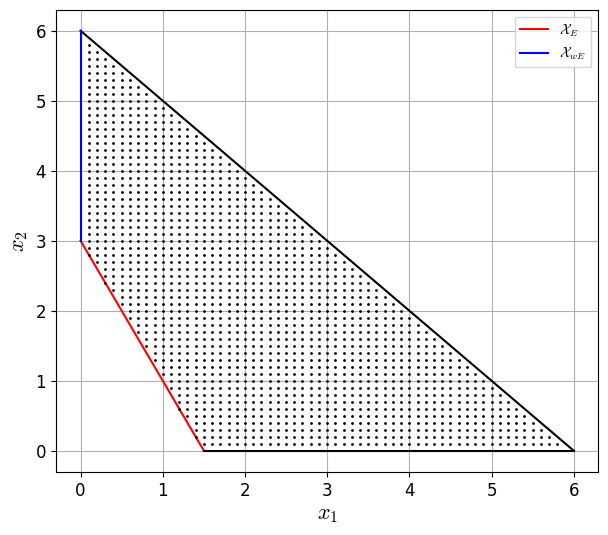

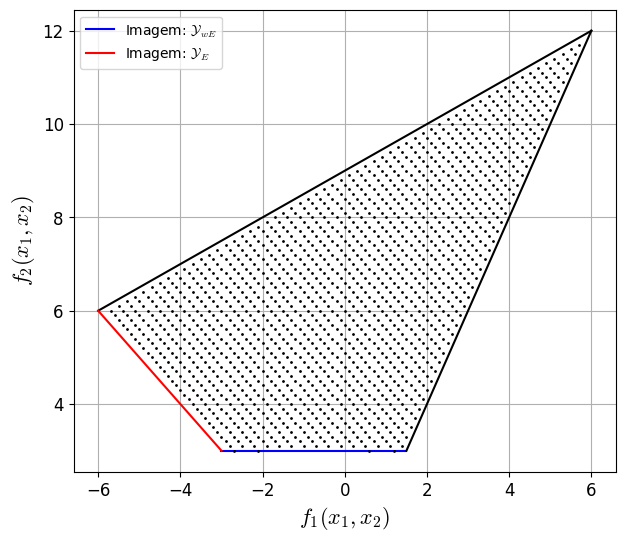

In [ ]:
#================================================================
# Figura 2.7: Conjuntos admissíveis do problema (2.3).
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ====================== Bibliotecas básicas ========================
import numpy as np                     # Álgebra vetorial para Python
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch  # Criação de polígonos e setas distintas

# 1) Configuração de MathText sem LaTeX externo, mas com a fonte Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm'

# Geração de malha
x1 = np.arange(0, 6.1, 0.1)
x2 = np.arange(0, 6.1, 0.1)
X1, X2 = np.meshgrid(x1, x2)

# Conjuntos de pontos para plotagem de fronteiras e interior
x1_vals, x2_vals = [], []
x3_vals, x4_vals = [], []
x5_vals, x6_vals = [], []
x7_vals, x8_vals = [], []
x9_vals, x10_vals = [], []

# Fronteira: x1 + x2 = 6
for xi in x1:
    for yi in x2:
        if np.isclose(xi + yi, 6):
            x1_vals.append(xi)
            x2_vals.append(yi)

# Fronteira: 2x1 + x2 = 3
for xi in x1:
    for yi in x2:
        if np.isclose(2 * xi + yi, 3):
            x3_vals.append(xi)
            x4_vals.append(yi)

# Fronteira: x1 = 0
for xi in x1:
    for yi in x2:
        if xi == 0 and 2 * xi + yi >= 3 and xi + yi <= 6:
            x5_vals.append(xi)
            x6_vals.append(yi)

# Fronteira: x2 = 0
for xi in x1:
    for yi in x2:
        if yi == 0 and 2 * xi + yi >= 3 and xi + yi <= 6:
            x7_vals.append(xi)
            x8_vals.append(yi)

# Interior viável
for xi in x1:
    for yi in x2:
        if xi > 0 and yi > 0 and 2 * xi + yi > 3 and xi + yi < 6:
            x9_vals.append(xi)
            x10_vals.append(yi)

# === GRÁFICO NO ESPAÇO DAS VARIÁVEIS (x1, x2) ===
plt.figure(figsize=(7,6))
plt.plot(x1_vals, x2_vals, 'k-')
plt.plot(x3_vals, x4_vals, 'r-', label=r'$\mathcal{X}_E$')
plt.plot(x5_vals, x6_vals, 'b-', label=r'$\mathcal{X}_{wE}$')
plt.plot(x7_vals, x8_vals, 'k-')
plt.plot(x9_vals, x10_vals, 'k.', markersize=2)
plt.xlabel(r'$x_1$', fontsize=16, fontweight='bold')
plt.ylabel(r'$x_2$', fontsize=16, fontweight='bold')
#plt.title('Conjunto admissível no espaço das soluções', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

# === TRANSFORMAÇÃO PARA O ESPAÇO DOS OBJETIVOS ===
def f1(x, y): return x - y
def f2(x, y): return 2 * x + y

# Imagem de cada fronteira
f1_vals = f1(np.array(x1_vals), np.array(x2_vals))
f2_vals = f2(np.array(x1_vals), np.array(x2_vals))

f3_vals = f1(np.array(x3_vals), np.array(x4_vals))
f4_vals = f2(np.array(x3_vals), np.array(x4_vals))

f5_vals = f1(np.array(x5_vals), np.array(x6_vals))
f6_vals = f2(np.array(x5_vals), np.array(x6_vals))

f7_vals = f1(np.array(x7_vals), np.array(x8_vals))
f8_vals = f2(np.array(x7_vals), np.array(x8_vals))

f9_vals = f1(np.array(x9_vals), np.array(x10_vals))
f10_vals = f2(np.array(x9_vals), np.array(x10_vals))

# === GRÁFICO NO ESPAÇO DOS OBJETIVOS (f1, f2) ===
plt.figure(figsize=(7,6))
plt.plot(f1_vals, f2_vals, 'k-')
plt.plot(f3_vals, f4_vals, 'b-', label='Imagem: $\mathcal{Y}_{wE}$')
plt.plot(f5_vals, f6_vals, 'r-', label='Imagem: $\mathcal{Y}_E$')
plt.plot(f7_vals, f8_vals, 'k-')
plt.plot(f9_vals, f10_vals, 'k.', markersize=2)

# Segmentos auxiliares

plt.xlabel(r'$f_1(x_1, x_2)$', fontsize=16, fontweight='bold')
plt.ylabel(r'$f_2(x_1, x_2)$', fontsize=16, fontweight='bold')
#plt.title('Conjunto admissível no espaço dos objetivos', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()


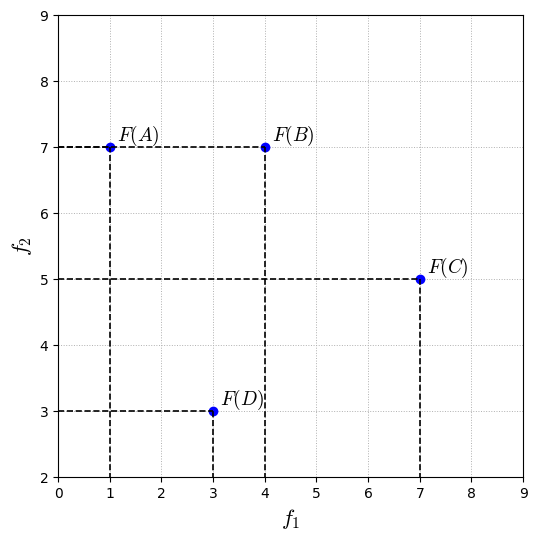

In [ ]:
#================================================================
# Figura 2.3: Imagem dos pontos A,B,C e D no conjunto dos objetivos Y.
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ====================== Bibliotecas básicas ========================
import numpy as np                     # Álgebra vetorial para Python
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch  # Criação de polígonos e setas distintas

# 1) Configuração de MathText sem LaTeX externo, mas com a fonte Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm'

def plot_dominance_points():
    # Definição dos pontos (x, y) de acordo com o enunciado
    A = (1, 7)
    B = (4, 7)
    C = (7, 5)
    D = (3, 3)

    # Lista de pontos e labels correspondentes
    points = [A, B, C, D]
    labels = ['$F(A)$', '$F(B)$', '$F(C)$', '$F(D)$']

    # Cria a figura e os eixos
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plotagem dos pontos
    for (x, y), label in zip(points, labels):
        # Plota o ponto
        ax.plot(x, y, 'o', color='blue')

        # Linhas tracejadas mais acentuadas e escuras
        ax.plot([x, x], [0, y], color='black', linestyle='--', linewidth=1.2)
        ax.plot([0, x], [y, y], color='black', linestyle='--', linewidth=1.2)

        # Anotação do label com fonte maior e em negrito
        ax.annotate(label,
                    xy=(x, y),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=14,
                    fontweight='bold',
                    ha='left')

    # Ajuste de limites dos eixos
    all_x = [p[0] for p in points]
    all_y = [p[1] for p in points]
    ax.set_xlim(min(all_x) - 1, max(all_x) + 2)
    ax.set_ylim(min(all_y) - 1, max(all_y) + 2)

    # Rótulos e título
    ax.set_xlabel('$f_1$', fontsize=16)
    ax.set_ylabel('$f_2$', fontsize=16)
    #ax.set_title('Exemplo de dominância entre pontos no espaço dos objetivos', fontsize=14)

    # Grade
    ax.grid(True, linestyle=':', linewidth=0.7)

    # Mostra o gráfico
    plt.show()

if __name__ == '__main__':
    plot_dominance_points()


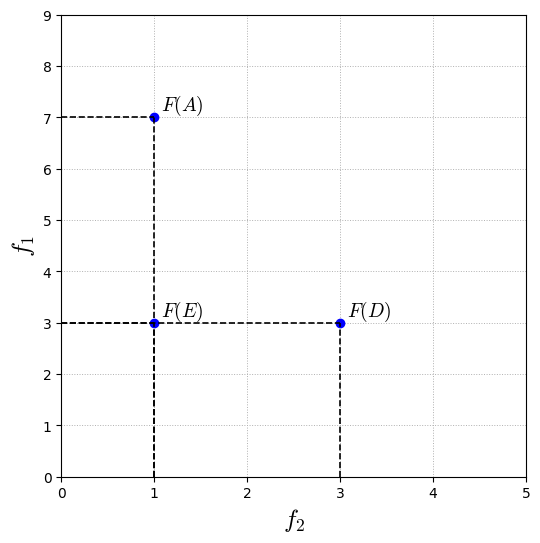

In [ ]:
#================================================================
# Figura 2.4: Imagem dos pontos A,B,C e D no conjunto dos objetivos Y.
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ====================== Bibliotecas básicas ========================
import numpy as np                     # Álgebra vetorial para Python
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch  # Criação de polígonos e setas distintas

# 1) Configuração de MathText sem LaTeX externo, mas com a fonte Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm'
def plot_dominance_example():
    # Pontos da nova figura
    A = (1, 7)
    E = (1, 3)
    D = (3, 3)

    points = [A, E, D]
    labels = ['$F(A)$', '$F(E)$', '$F(D)$']

    fig, ax = plt.subplots(figsize=(6, 6))

    # Plotar cada ponto com linhas tracejadas escuras e rótulos grandes
    for (x, y), label in zip(points, labels):
        ax.plot(x, y, 'o', color='blue')
        ax.plot([x, x], [0, y], color='black', linestyle='--', linewidth=1.2)
        ax.plot([0, x], [y, y], color='black', linestyle='--', linewidth=1.2)

        ax.annotate(label,
                    xy=(x, y),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=14,
                    fontweight='bold',
                    ha='left')

    # Ajustes dos eixos
    all_x = [p[0] for p in points]
    all_y = [p[1] for p in points]
    ax.set_xlim(0, max(all_x) + 2)
    ax.set_ylim(0, max(all_y) + 2)

    # Rótulos
    ax.set_xlabel('$f_2$', fontsize=18)
    ax.set_ylabel('$f_1$', fontsize=18)


    ax.grid(True, linestyle=':', linewidth=0.7)
    plt.show()

if __name__ == '__main__':
    plot_dominance_example()


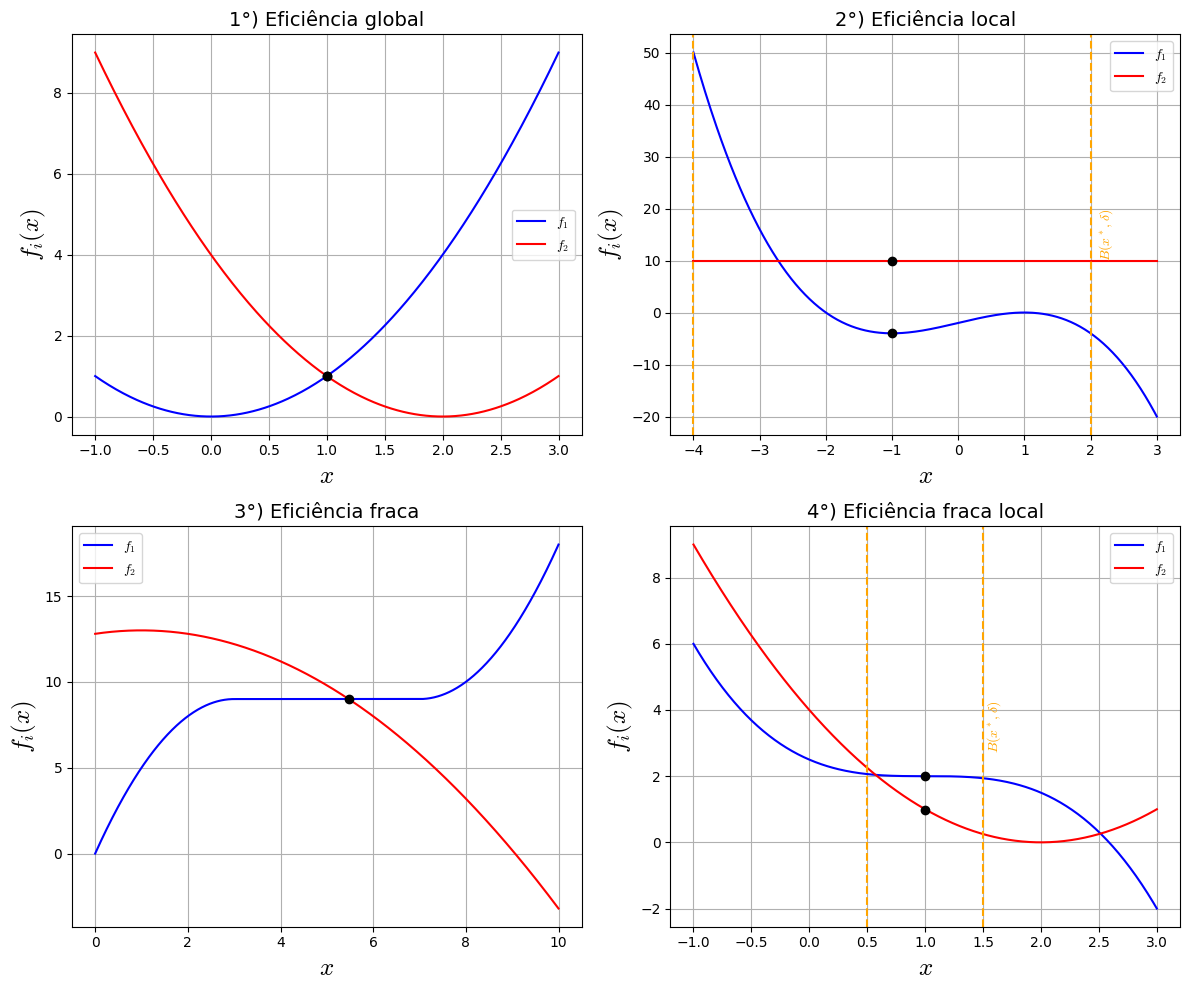

In [ ]:
#================================================================
# Figura 2.4: Imagem dos pontos A,B,C e D no conjunto dos objetivos Y.
#================================================================
# Este script foi usado na construção de uma figura específica do trabalho.
# ====================== Bibliotecas básicas ========================
import numpy as np                     # Álgebra vetorial para Python
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch  # Criação de polígonos e setas distintas

# 1) Configuração de MathText sem LaTeX externo, mas com a fonte Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm
# ====================== Parâmetros gerais ===============================
delta   = 0.5   # Semilargura da vizinhança B(x*, delta)
x_star  = 1.0   # Ponto candidato a eficiencia global


#============Pareto ótimo global ==============
x_small = np.linspace(-1, 3, 400)
# Vai criar duas parábolas convexas que se tocam em x = 1
f1_a = x_small**2
f2_a = (x_small - 2)**2

# ========== Novo gráfico de Pareto ótimo local=======
x_b = np.linspace(-4, 3, 400)
f1_b = -(x_b + 1)**2 * (x_b - 2) - 4 # f1_b tem um mínimo local em x = -1 e f2_b é constante
f2_b = np.full_like(x_b, 10)  # Reta horizontal y=10

x_star_b = -1 #ponto candidato
y_f1_star = -(x_star_b + 1)**2 * (x_star_b - 2) - 4
y_f2_star = 10
delta_b = 3  # largura para ilustrar a "vizinhança" ampla

# ======== Pareto ótimo fraco global=======
x_large = np.linspace(0, 10, 1000)
def f1_c_func(x):
   """
    Parábola invertida até o ponto x=3, depois f(x)=9 em [3,7],
    depois parábola ascendente.
    """
    return np.where(
        x < 3,
        -(x - 3)**2 + 9,
        np.where(
            x <= 7,
            9,
            (x - 7)**2 + 9
        )
    )
def f2_c_func(x):
  """
    Função parábola invertida larga
    para que as curvas se cruzem apenas 1 vez.
    """
    return -0.2 * (x - 1)**2 + 13
f1_c = f1_c_func(x_large)
f2_c = f2_c_func(x_large)

# Calcula a interseção aproximada
# Usa mudança de sinal em d = f1 - f2 e interpolação linear simples
# porque as curvas são suaves e há no máximo um cruzamento.
d = f1_c - f2_c
idx = np.where(np.diff(np.sign(d)))[0]# índices onde há troca de sinal
if idx.size > 0:
    i = idx[0]
    x0, x1 = x_large[i], x_large[i+1]
    d0, d1 = d[i], d[i+1]
    x_int = x0 - d0 * (x1 - x0) / (d1 - d0) #interpolação linear
    y_int = np.interp(x_int, x_large, f1_c) #valor comum f1=f2
else:
  # Caso as curvas nunca se cruzem
    x_int = y_int = None

# --- (d) Pareto ótimo fraco local ---
#Aqui f1_d tem termo cúbico então só domina f2_d numa vizinhança de x_star.
f1_d = -0.5 * (x_small - x_star)**3 + 2
f2_d = (x_small - 2)**2

# Criação da figura com 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3) # Espaçamento vertical/horizontal

# ========== Gráfico (a): Pareto ótimo global ===========
ax = axes[0, 0]
ax.plot(x_small, f1_a, label='$f_1$', color='blue')
ax.plot(x_small, f2_a, label='$f_2$', color='red')
idx_star_a = np.abs(x_small - x_star).argmin()
ax.plot(x_star, f1_a[idx_star_a], 'ko')
ax.plot(x_star, f2_a[idx_star_a], 'ko')
ax.set_title('1°) Eficiência global',fontsize=14)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$f_i(x)$',fontsize=18)
ax.legend()
ax.grid(True)

# =========== Gráfico (b): Pareto ótimo local com novo exemplo ====
ax = axes[0, 1]
ax.plot(x_b, f1_b, label='$f_1$', color='blue')
ax.plot(x_b, f2_b, label='$f_2$', color='red')
ax.plot(x_star_b, y_f1_star, 'ko')  # ponto sobre f1
ax.plot(x_star_b, y_f2_star, 'ko')  # ponto sobre f2
ax.axvline(x_star_b - delta_b, ls='--', color='orange')
ax.axvline(x_star_b + delta_b, ls='--', color='orange')
ax.text(x_star_b + delta_b + 0.1, 0.5*(ax.get_ylim()[0] + ax.get_ylim()[1]),
        '$B(x^*,\\delta)$', rotation=90, color='orange', va='center')
ax.set_title('2°) Eficiência local',fontsize=14)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$f_i(x)$',fontsize=18)
ax.legend()
ax.grid(True)

# =========== Gráfico (c): Pareto ótimo fraco global ============
ax = axes[1, 0]
ax.plot(x_large, f1_c, label='$f_1$', color='blue')
ax.plot(x_large, f2_c, label='$f_2$', color='red')
if x_int is not None:
    ax.scatter([x_int], [y_int], color='black', zorder=5)
ax.set_title('3°) Eficiência fraca',fontsize=14)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$f_i(x)$',fontsize=18)
ax.legend()
ax.grid(True)

# -======== Gráfico (d): Pareto ótimo fraco local===
ax = axes[1, 1]
ax.plot(x_small, f1_d, label='$f_1$', color='blue')
ax.plot(x_small, f2_d, label='$f_2$', color='red')
idx_star_d = np.abs(x_small - x_star).argmin()
ax.plot(x_star, f1_d[idx_star_d], 'ko')
ax.plot(x_star, f2_d[idx_star_d], 'ko')
ax.axvline(x_star - delta, ls='--', color='orange')
ax.axvline(x_star + delta, ls='--', color='orange')
ax.text(x_star + delta + 0.02, 0.5*(ax.get_ylim()[0] + ax.get_ylim()[1]),
        '$B(x^*,\\delta)$', rotation=90, color='orange', va='center')
ax.set_title('4°) Eficiência fraca local',fontsize=14)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$f_i(x)$',fontsize=18)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


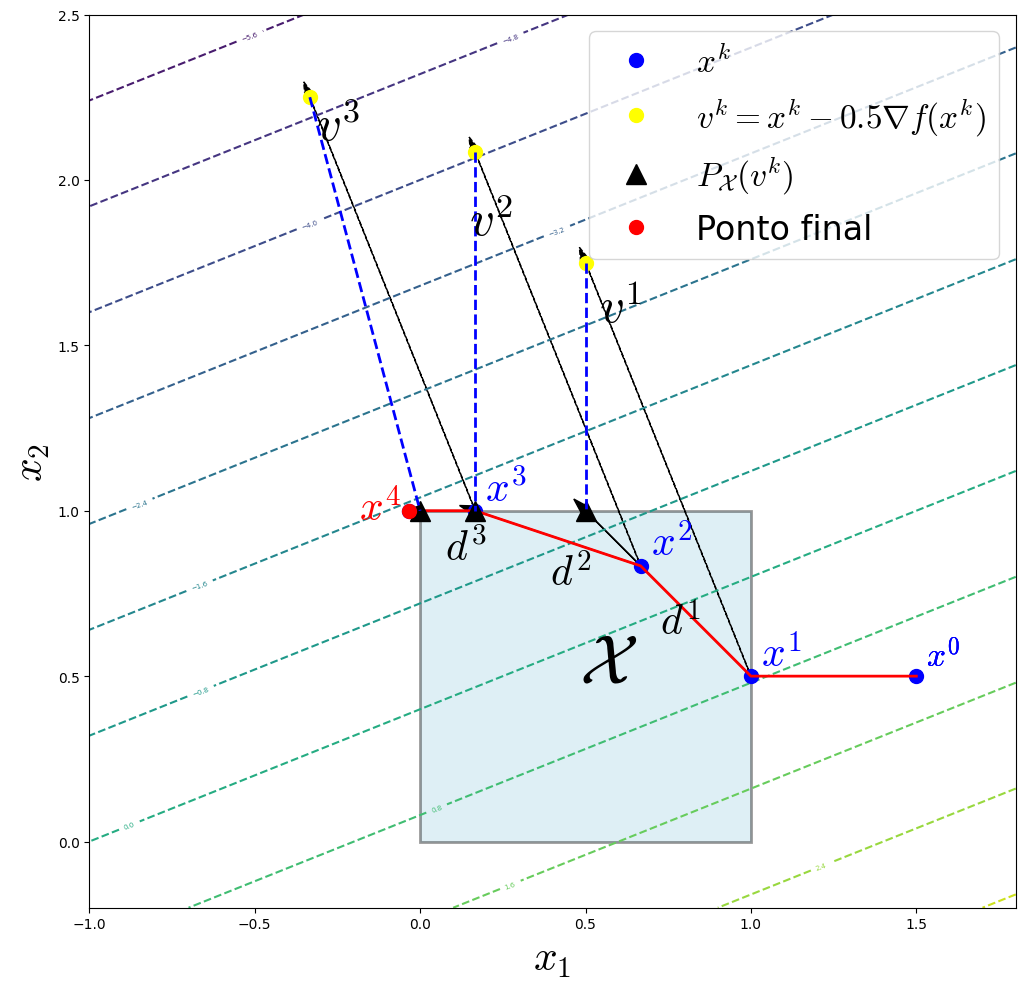

In [ ]:

#================================================================
# Figura 1.6: Aplicação do Método do Gradiente Projetado.
#================================================================

# ====================== Bibliotecas básicas ========================
import numpy as np                     # Álgebra vetorial para Python
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch  # Criação de polígonos e setas distintas

# 1) Configuração de MathText sem LaTeX externo, mas com a fonte Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm'

# Função objetivo e seu gradiente
def f(x):
    return  x[0] - 2.5* x[1] + 1

def grad_f(x):
    return np.array([1.0, -2.5])

def proj_caixa(x, lower=0.0, upper=1.0):
    return np.clip(x, lower, upper)

# Parâmetros do algoritmo
alfa    = 0.5        # Usado na direção de busca
max_iter =3          # poucas iterações para manter o gráfico limpo
tol      = 1e-6      # Tolerância do critério de parada

x0 = np.array([1.5, 0.5])      # x0  fora de X


x1    = proj_caixa(x0)           # projecção inicial x¹

def backtrack(k: int) -> float: #Um backtracking mais simples, sem busca linear não monótona
    """τ_k = 1/(k+1)  → ½, ⅓, ¼, …"""
    return k/(k/2+1)

pontos       = [x0, x1]   # x⁰, x¹
intermed     = []            # uk
projections  = []            # pk
direcoes   = []            # vk

x = x1.copy()                # primeiro ponto viável: x1
for k in range(1, max_iter + 1):
    vk = x - alfa * grad_f(x)     # passo de gradiente
    pk = proj_caixa(vk)             # projecção
    direcao_k = pk - x             # direcção obtida "direção oposta ao gradiente"
    tau = backtrack(k)        # backtracking
    x_next = x + tau * direcao_k         # novo ponto no segmento

    intermed.append(vk)
    projections.append(pk)
    direcoes.append(direcao_k)
    pontos.append(x_next)

    if np.linalg.norm(x_next - x) < tol: #critério de parada
        break
    x = x_next

pontos      = np.array(pontos)
intermed    = np.array(intermed)
projections = np.array(projections)

# =========================================================
# Malha para curvas de nível de f

x_vals = np.linspace(-1.0, 2.0, 100)
y_vals = np.linspace(-0.2, 2.5, 100)
xx, yy = np.meshgrid(x_vals, y_vals)
Z =  xx - 2.5* yy + 1

# =========================================================
# Pequenos ajustes nos rótulos
text_offsets = {
    0: ( 0.08, -0.16),       # rótulos de vk
    1: ( 0.04, -0.23),
    2: (-0.02, -0.30),
}
default_text_offset = (0.02, -0.18)

d_offsets = {
    1: ( 0.04, -0.07),   # rótulos de direcao_k
    2: (-0.05, -0.07),
    3: (-0.07, -0.11),
}
default_d_offset = (0.03, -0.07)


plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=0.10)

# Curvas de nível
contours = plt.contour(xx, yy, Z, levels=15,
                       cmap='viridis', linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=5)


plt.gca().add_patch(Rectangle((0, 0), 1, 1,
               edgecolor='black', facecolor='lightblue',
               alpha=0.4, linewidth=2))
plt.text(0.48, 0.48, r'$\mathcal{X}$', fontsize=50, color='black')


# Pontos xk azuis
plt.plot(pontos[:, 0], pontos[:, 1], 'bo', label=r'$x^k$', markersize=10)
plt.plot(pontos[:, 0], pontos[:, 1], 'r-', linewidth=2)

# pontos vk pretos
plt.plot(intermed[:, 0], intermed[:, 1], 'o',
         color='yellow', label=r'$v^k = x^k - 0.5 \nabla f(x^k)$', markersize=10)

# Projeções P em azul
plt.plot(projections[:, 0], projections[:, 1], '^',
         color='black', label=r'$P_{\mathcal{X}}(v^k)$', markersize=15)

# ================  Setas, segmentos, rótulos  =========
for k in range(1, len(pontos)-1):
    vk = intermed[k-1]
    pk = projections[k-1]
    direcao_k = direcoes[k-1]
    xk = pontos[k]

    # Rótulo do ponto x^0
    plt.text(pontos[0, 0] + 0.03,pontos[0, 1] + 0.03, r"$x^0$", fontsize=24, color='blue', weight='bold')

    # Seta direcao_k
    plt.arrow(xk[0], xk[1], direcao_k[0], direcao_k[1],
              head_width=0.03, head_length=0.05,
              fc='black', ec='black')

    plt.plot([vk[0], pk[0]], [vk[1], pk[1]],
             'b--', linewidth=2)    # Segmento que ligaa vk até Pk



    plt.arrow(xk[0], xk[1],
              vk[0] - xk[0], vk[1] - xk[1],
              head_width=0.03, head_length=0.05,
              fc='black', ec='black', linestyle='dashed') # Seta do gradiente xk para uk

    plt.text(xk[0] + 0.03, xk[1] + 0.03,
             fr"$x^{{{k}}}$", fontsize=30, color='blue') # Rótulo do ponto xk


   # plt.text(pk[0] + 0.2, pk[1] + 0.07,
   #          r"$P_{\mathcal{X}}^{k}$", fontsize=18, color='blue') # Rótulo PX

    # Texto de vk
    dx_t, dy_t = text_offsets.get(k, default_text_offset) #o ext_offsets é um dicionário que armazena deslocamentos específicos
    plt.text(vk[0] + dx_t, vk[1] + dy_t+0.05,
             fr"$v^{{{k}}}$", fontsize=35, color='black')


    # Rótulo direcao_k
    dx_d, dy_d = d_offsets.get(k, default_d_offset)
    plt.text(xk[0] + 0.55*direcao_k[0],
             xk[1] + 0.55*direcao_k[1]-0.15,
             fr"$d^{{{k}}}$", fontsize=30, color='black')

# Ponto final destacado
last = len(pontos) - 1
plt.plot(pontos[last, 0], pontos[last, 1],
         'ro', markersize=10, label='Ponto final')
plt.text(pontos[last, 0] - 0.15, pontos[last, 1] - 0.03,
         fr"$x^{{{last}}}$", fontsize=30, color='red')

# ========================= Ajustes finais  ===============================
plt.xlabel(r'$x_1$', fontsize=30)
plt.ylabel(r'$x_2$', fontsize=30)
#plt.title(r'Método do Gradiente Projetado $\; f(x,y)=x-2.5y+1$', fontsize=18)
plt.legend(fontsize=24, loc='upper right')
plt.grid(False)

plt.xlim(-1.0, 1.8)
plt.ylim(-0.2, 2.5)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


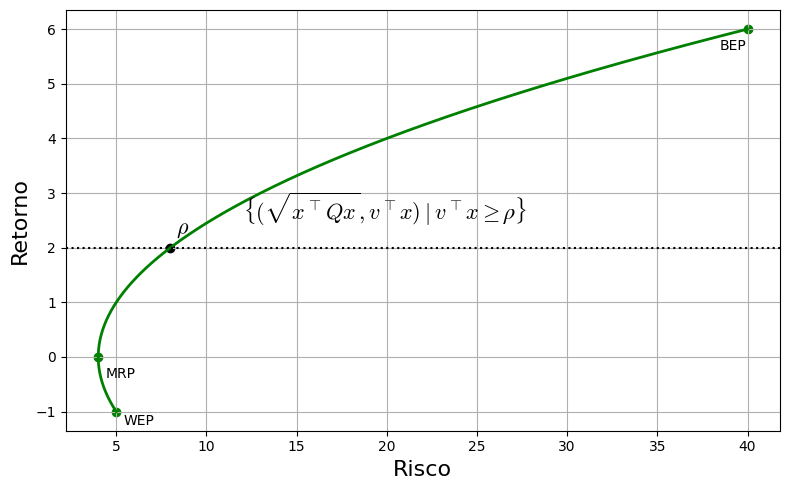

In [ ]:
#================================================================
# Figura 4.1: Fronteira eficiente em problema de otimização de portfólio.
#================================================================

# ====================== Bibliotecas básicas ========================
import numpy as np                     # Álgebra vetorial para Python
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Polygon, FancyArrowPatch  # Criação de polígonos e setas distintas

# 1) Configuração de MathText sem LaTeX externo, mas com a fonte Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm'

# Parametrização da curva implícita y^2 – x = –4 → x = y^2 + 4
y = np.linspace(-1, 6, 400)
x = y**2 +4

# Threshold horizontal
rho = 2.0

# Pontos especiais sobre a curva
y_wep, x_wep = -1, (-1)**2 + 4    # WEP em y = –1 → x = 5
y_mrp, x_mrp =  0,   (0)**2   + 4 # MRP = vértice em y = 0 → x = 4
y_rho, x_rho = rho, rho**2 + 4    # ponto rho: interseção com y = rho
y_bep, x_bep =  6,   (6)**2 +4  # BEP em y =  7 → x = 53

# Inicia plot
plt.figure(figsize=(8, 5))

# Curva de Pareto em verde
plt.plot(x, y, color='green', linewidth=2)

# Threshold horizontal pontilhado
plt.axhline(rho, color='black', linestyle=':', linewidth=1.5)

# Marcar WEP
plt.scatter(x_wep, y_wep, color='green')
plt.annotate('WEP',
             xy=(x_wep, y_wep),
             xytext=(5, -10),
             textcoords='offset points')

# Marcar MRP (vértice da parábola)
plt.scatter(x_mrp, y_mrp, color='green')
plt.annotate('MRP',
             xy=(x_mrp, y_mrp),
             xytext=(5, -15),
             textcoords='offset points')

# Marcar ponto rho (interseção com a reta y = rho)
plt.scatter(x_rho, y_rho, color='black')
plt.annotate(r'$\rho$',
             xy=(x_rho, y_rho),
             xytext=(4, 10),
             textcoords='offset points',fontsize=16)

# Marcar BEP
plt.scatter(x_bep, y_bep, color='green')
plt.annotate('BEP',
             xy=(x_bep, y_bep),
             xytext=(-20, -15),
             textcoords='offset points')

# Anotação do conjunto viável usando Unicode “≥”
plt.text(12, rho+0.5,
         r'$\{(\sqrt{x^{\top}Qx}, v^{\top}x) \mid v^{\top}x \geq ρ\}$',
         fontsize=16)

# Labels e título
plt.xlabel(r'Risco', fontsize=16) #'Risco - $\sigma(x)
plt.ylabel(r'Retorno',fontsize=16) #'Retorno - $v^{\top}x$

plt.grid(True)
plt.tight_layout()
plt.show()


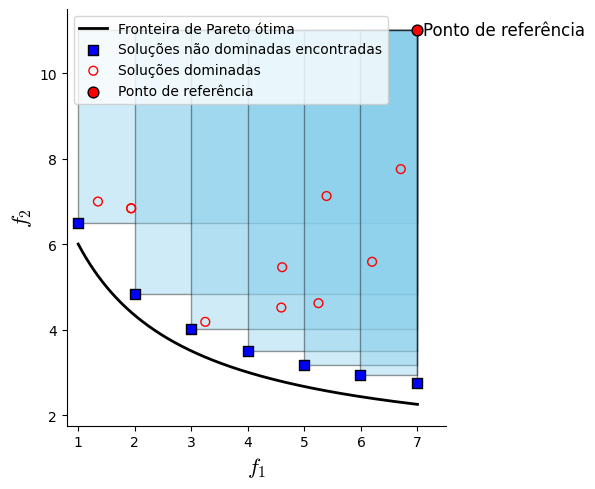

In [ ]:

#================================================================
# Figura 4.2: Exemplo do Hipervolume de um conjunto de soluções não dominadas arbitrárias.
#================================================================

# ====================== Bibliotecas básicas ========================
import numpy as np                     # Álgebra vetorial para Python
import matplotlib.pyplot as plt        # Criação de gráficos
from matplotlib.patches import Rectangle  # Criação de retângulos

# 1) Configuração de MathText sem LaTeX externo, mas com a fonte Computer Modern
plt.rcParams['text.usetex']        = False
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.serif']         = ['Computer Modern']
plt.rcParams['mathtext.fontset']   = 'cm'

D = np.array([7.0, 11.0])  # ponto de referência
x_opt = np.linspace(1.0, D[0], 500)
y_opt = 10 / (x_opt + 1) + 1   # curva suave

# Pontos não dominados (quadrados azuis)
idx = np.linspace(0, len(x_opt)-1, 7, dtype=int) #Cria um vetor de 7 índices inteiros igualmente espaçados, de 0 até len(x_opt)-1, esses 7 serão os exemplos de pontos não dominados

fronteira_aprox = np.column_stack((x_opt[idx], y_opt[idx] + 0.5)) # Calcula f1 e f2 desses dois pontos e eleva f2 em 0.5 para ficar acima da frente ótima e retorna um array 7 × 2 com np.column_stack de f1xf2
# 10 pontos dominados gerados abaixo de f2 = 8 e dentro da região de hipervolume
np.random.seed(42)
num_dom = 10
rand_x = np.random.uniform(x_opt.min(), fronteira_aprox[:, 0].max(), num_dom)
# recalcula a fronteira aproximada formada por esses 7 pontos (já com f2+0.5)
fronteira_x = fronteira_aprox[:, 0]
fronteira_y = fronteira_aprox[:, 1]
# para cada rand_x, buscamos o último índice j com fronteira_x[j] <= rand_x
ix = np.searchsorted(fronteira_x, rand_x) - 1 #Para cada valor de rand_x, a função devolve a posição onde ele seria inserido em fronteira_x mantendo a ordem crescente.
ix[ix < 0] = 0    #Se algum rand_x cair antes do primeiro ponto, np.sea manda 0    #Caso fronteira_x = [1.00, 2.3, 3.3, …] e rand_x = 1.5, o índice retornado é 2-1=1 (esquerda de 2.3).
somb_y = fronteira_y[ix]  #Esse somb_y serve como limite inferior para sortear a coordenada vertical do ponto dominado.

upper_y = min(8.0, D[1]) - 0.1 #Queremos que todos os pontos dominados fiquem abaixo da linha f₂ = 8 e abaixo do ponto de referência D[1] = 11. subtraímos 0.1 por segurança
rand_y = np.random.uniform(somb_y + 0.1, upper_y, num_dom) #Para cada rand_x temos um somb_y (a altura do quadrado azul na esquerda).- Sorteamos rand_y entre somb_y + 0.1 (abaixo do quadrado azul) e upper_y = 7.9  abaixo da linha f2 = 8.
dominated = np.column_stack((rand_x, rand_y))

# ===============================
# Plotagem
# ===============================
fig, ax = plt.subplots(figsize=(6, 5))

# Retângulos de hipervolume
for xi, yi in fronteira_aprox:
    rect = Rectangle(
        (xi, yi),
        D[0] - xi,
        D[1] - yi,
        facecolor='skyblue', alpha=0.4,
        edgecolor='black'
    )
    ax.add_patch(rect)

# Fronteira de Pareto ótima (linha preta)
ax.plot(x_opt, y_opt, color='black', linewidth=2, label='Fronteira de Pareto ótima')

# Soluções não dominadas encontradas (quadrados azuis)
ax.scatter(
    fronteira_aprox[:, 0],
    fronteira_aprox[:, 1],
    marker='s', s=50,
    color='blue', edgecolor='black',
    zorder=5, label='Soluções não dominadas encontradas'
)

# Soluções dominadas dentro da região (bolinhas azuis abertas, 10 pontos)
ax.scatter(
    dominated[:, 0],
    dominated[:, 1],
    marker='o', s=40,
    facecolors='none', edgecolors='red',
    zorder=6, label='Soluções dominadas'
)

# Ponto de referência (bolinha vermelha)
ax.scatter(*D, marker='o', color='red', s=60, edgecolor='black',
           zorder=7, label='Ponto de referência')
ax.text(D[0] + 0.1, D[1], 'Ponto de referência', va='center', ha='left', fontsize=12)

# Ajustes dos eixos
ax.set_xlabel('$f_1$', fontsize=16)
ax.set_ylabel('$f_2$',fontsize=16)
ax.set_xlim(0.8, D[0] + 0.5)
ax.set_ylim(y_opt.min() - 0.5, D[1] + 0.5)

# Remover grid e eixos desnecessários
ax.grid(False)
ax.spines[['top', 'right']].set_visible(False)

# Legenda no canto superior esquerdo
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()



### Iniciando Multi‑Start ###

Início  1: x0 = [2.74406752 3.57594683], y0 = [0.60276338 0.54488318]
  -> x* = [0.         0.83187931], y* = [1.00000000e+00 2.35668155e-16],  F(x*) = [0.         0.83187931]

Início  2: x0 = [2.118274   3.22947057], y0 = [0.43758721 0.891773  ]
  -> x* = [8.83138118e-16 3.26945053e-01], y* = [1.00000000e+00 4.16333634e-17],  F(x*) = [8.83138118e-16 3.26945053e-01]

Início  3: x0 = [4.8183138  1.91720759], y0 = [0.79172504 0.52889492]
  -> x* = [1.95371893e+00 3.21964677e-15], y* = [2.49800181e-15 1.00000000e+00],  F(x*) = [1.95371893e+00 3.21964677e-15]

Início  4: x0 = [2.84022281 4.62798319], y0 = [0.07103606 0.0871293 ]
  -> x* = [0.         1.78776039], y* = [1.00000000e+00 3.05360443e-16],  F(x*) = [0.         1.78776039]

Início  5: x0 = [0.10109199 4.16309923], y0 = [0.77815675 0.87001215]
  -> x* = [0.         1.31019533], y* = [1.00000000e+00 1.05471187e-15],  F(x*) = [0.         1.31019533]

Início  6: x0 = [4.89309171 3.99579282], y0 = [0.46

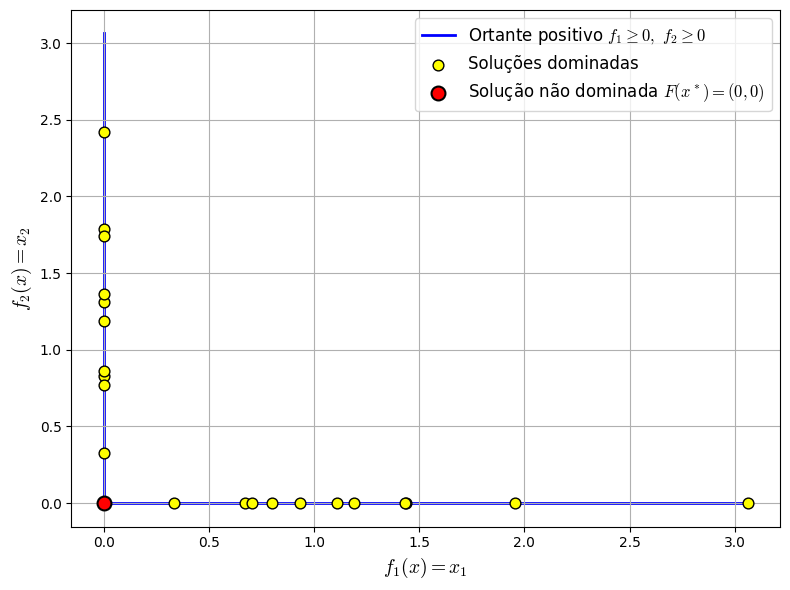

In [4]:
# ============================================================
# Figura 3.2: Espaço dos objetivos do Exemplo 3.14 com não dominância do vetor nulo.
# ============================================================
!pip install numpy scipy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ================================================================
#  Configuração de fontes
# ===============================================================
plt.rcParams['text.usetex']      = False
plt.rcParams['font.family']      = 'serif'
plt.rcParams['font.serif']       = ['Computer Modern']
plt.rcParams['mathtext.fontset'] = 'cm'

# ============================================================
# DADOS BÁSICOS
# ============================================================
n         = 2        # dimensão de x
dim       = 2 * n    # dimensão total (x,y)
alpha     = 1        # cardinalidade máxima
tol_stop  = 1e-5
max_outer = 50       # iterações externas
M_hist    = 10       # janela não-monótona

# ============================================================
# DEFINIÇÃO DAS FUNÇÕES
# ============================================================
def F(z):
    x = z[:n]
    return np.array([x[0], x[1]])

def F_pen(z, tau, lam):
    Fx   = F(z)
    x, y = z[:n], z[n:]
    had  = x * y
    penalty = lam @ had + 0.5 * tau * np.sum(had**2)
    return Fx + penalty

def jacobian_F_pen(z, tau, lam):
    x, y = z[:n], z[n:]
    had  = x * y
    dp_dx = lam*y + tau*(had*y)
    dp_dy = lam*x + tau*(had*x)
    g1x = np.array([1.0, 0.0]) + dp_dx
    g2x = np.array([0.0, 1.0]) + dp_dx
    row1 = np.concatenate([g1x, dp_dy])
    row2 = np.concatenate([g2x, dp_dy])
    return np.vstack([row1, row2])

def dykstra(z, maxcycles=500, tol=1e-12):
    z = z.copy()
    d1 = np.zeros(dim); d2 = np.zeros(dim); d3 = np.zeros(dim)
    for _ in range(maxcycles):
        err = 0.0
        # x ≥ 0
        tmp = z.copy()
        for i in range(n):
            z[i]  = max(tmp[i] - d1[i], 0.0)
            d1[i] = z[i] - (tmp[i] - d1[i])
            err  += (z[i]-tmp[i])**2
        # y PERTENCE [0,1]
        tmp = z.copy()
        ypr = np.clip(tmp[n:]-d2[n:], 0.0,1.0)
        d2[n:], z[n:] = ypr - (tmp[n:]-d2[n:]), ypr
        err += np.linalg.norm(ypr-tmp[n:])**2
        # sum y >= n-α
        tmp = z.copy()
        s   = np.sum(tmp[n:]-d3[n:])
        if s < (n-alpha):
            corr = ((n-alpha)-s)/n
            yhp  = (tmp[n:]-d3[n:]) + corr
        else:
            yhp  = tmp[n:]-d3[n:]
        d3[n:], z[n:] = yhp - (tmp[n:]-d3[n:]), yhp
        err += np.linalg.norm(yhp-tmp[n:])**2
        if np.sqrt(err)<tol:
            break
    return z

proj = dykstra

def busca_direcao(z, tau, lam, tol=1e-10):
    J   = jacobian_F_pen(z, tau, lam)
    dt0 = np.concatenate([np.zeros(dim), [0.0]])
    obj      = lambda dt: dt[-1] + 0.5*np.dot(dt[:-1], dt[:-1])
    obj_grad = lambda dt: np.concatenate([dt[:-1], [1.0]])
    cons = []
    # t ≥ J_i d
    for i in range(2):
        cons.append({'type':'ineq',
                     'fun': lambda dt,i=i: dt[-1] - J[i]@dt[:-1]})
    # viabilidade z+d
    for i in range(n):
        cons.append({'type':'ineq',
                     'fun': lambda dt,i=i: z[i]+dt[i]})
    for j in range(n, dim):
        cons.append({'type':'ineq',
                     'fun': lambda dt,j=j: z[j]+dt[j]})
        cons.append({'type':'ineq',
                     'fun': lambda dt,j=j: 1.0-(z[j]+dt[j])})
    cons.append({'type':'ineq',
                 'fun': lambda dt: np.sum(z[n:]+dt[n:-1])-(n-alpha)})
    res = minimize(obj, dt0, jac=obj_grad, constraints=cons,
                   method='SLSQP',
                   options={'ftol':tol,'maxiter':500,'disp':False})
    return res.x[:-1], res.fun

def compute_A_k(vals, k, M=M_hist):
    s = vals[max(0,k-M):k+1]
    return np.array([max(v[0] for v in s), max(v[1] for v in s)])

def armijo_step(z, d, tau, lam, A_k, δ=0.5):
    Jd = np.array([jacobian_F_pen(z,tau,lam)[i]@d for i in (0,1)])
    for j in range(20):
        α = 1/(2**j)
        if np.all(F_pen(z+α*d, tau, lam) <= A_k + δ*α*Jd):
            return α
    return 1.0

def buscadirecao(z, tau, lam, max_iter=30, tol=1e-8):
    f_hist = []
    for k in range(max_iter):
        f_hist.append(F_pen(z,tau,lam))
        d, _ = busca_direcao(z,tau,lam)
        if np.linalg.norm(d)<=tol:
            break
        A_k = compute_A_k(f_hist, k)
        α   = armijo_step(z, d, tau, lam, A_k)
        z   = proj(z + α*d)
    return z, d

def PGMMOP(z0):
    z   = proj(z0)
    lam = np.ones(n); tau = 1.0
    for k in range(max_outer):
        z_new, d = buscadirecao(z,tau,lam)
        x_new,y_new = z_new[:n], z_new[n:]
        norm_had = np.linalg.norm(x_new*y_new)
        diffF    = np.linalg.norm(F_pen(z_new,tau,lam)-F_pen(z,tau,lam))
        # Critério de parada externo
        if norm_had**2 <= tol_stop and diffF<=tol_stop:
            break
        lam = np.clip(lam + tau*(x_new*y_new), -1e-4, 1e4)
        tau = min(tau*10, 1e5)
        z   = z_new
    return z

# ============================================================
# MULTI-START + PRINT DAS SOLUÇÕES x*, y*
# ============================================================
np.random.seed(0)
solution_images = []
print("\n### Iniciando Multi‑Start ###\n")
for i in range(30):
    x0 = np.random.uniform(0,5,n)
    y0 = np.random.uniform(0,1,n)
    z0 = proj(np.hstack([x0,y0]))
    print(f"Início {i+1:2d}: x0 = {x0}, y0 = {y0}")
    z_opt = PGMMOP(z0)
    x_opt, y_opt = z_opt[:n], z_opt[n:]
    f_opt = F(z_opt)
    solution_images.append(f_opt)
    print(f"  -> x* = {x_opt}, y* = {y_opt},  F(x*) = {f_opt}\n")

# ============================================================
# FILTRO DE DOMINÂNCIA
# ============================================================
def domina(a,b):
    return np.all(a<=b) and np.any(a<b)

dominated, nondominated = [], []
for s in solution_images:
    if any(domina(o,s) for o in solution_images if not np.array_equal(o,s)):
        dominated.append(s)
    elif any(domina(p,s) for p in dominated):
        dominated.append(s)
    else:
        nondominated.append(s)

# ============================================================
# PLOT FINAL
# ============================================================
fig, ax = plt.subplots(figsize=(8,6))

# Ortante positivo
max_coord = max([v.max() for v in solution_images] + [1.0])
ax.plot([0, max_coord], [0, 0],
        color='blue', lw=2,
        label=r'Ortante positivo $f_1\geq 0,\ f_2\geq 0$',
        zorder=1)
ax.plot([0, 0], [0, max_coord],
        color='blue', lw=2, zorder=1)

# Soluções dominadas (amarelo)
first_dom = True
for s in dominated:
    lbl = 'Soluções dominadas' if first_dom else ''
    ax.scatter(s[0], s[1],
               s=60, color='yellow', edgecolor='black',
               label=lbl, zorder=3)
    first_dom = False

# Solução não dominada (vermelho) por cima de tudo
ax.scatter(0, 0,
           s=100, color='red', edgecolor='black',
           linewidths=1.5,
           label=r'Solução não dominada $F(x^*)=(0,0)$',
           zorder=100)

# Labels e grade
ax.set_xlabel(r'$f_1(x)=x_1$', fontsize=14)
ax.set_ylabel(r'$f_2(x)=x_2$', fontsize=14)
ax.grid(True)

# Legenda sem duplicatas
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),
          loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()
